# Data Transform

In this notebook, we will ask you a series of questions to evaluate your findings from your EDA. Based on your response & justification, we will ask you to also apply a subsequent data transformation. 

If you state that you will not apply any data transformations for this step, you must **justify** as to why your dataset/machine-learning does not require the mentioned data preprocessing step.

The bonus step is completely optional, but if you provide a sufficient feature engineering step in this project we will add `1000` points to your Kahoot leaderboard score.

You will write out this transformed dataframe as a `.csv` file to your `data/` folder.

**Note**: Again, note that this dataset is quite large. If you find that some data operations take too long to complete on your machine, simply use the `sample()` method to transform a subset of your data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


In [24]:
banktransactions = pd.read_csv('../data/bank_transactions.csv')

## Q1

Does your model contain any missing values or "non-predictive" columns? If so, which adjustments should you take to ensure that your model has good predictive capabilities? Apply your data transformations (if any) in the code-block below.

There are no missing values.

In [ ]:
# Count missing values
banktransactions.isnull().sum()

type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
non_predictivevalues = ['nameOrig', 'nameDest']
target = 'isFraud'
# Drop non-predictive columns
transactions_clean = banktransactions.drop(columns=['nameOrig', 'nameDest'])
# Check shape and column types
transactions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   type                     1000000 non-null  object 
 1   amount                   1000000 non-null  float64
 2   oldbalanceOrg            1000000 non-null  float64
 3   newbalanceOrig           1000000 non-null  float64
 4   oldbalanceDest           1000000 non-null  float64
 5   newbalanceDest           1000000 non-null  float64
 6   isFraud                  1000000 non-null  int64  
 7   isFlaggedFraud           1000000 non-null  int64  
 8   isHighAmount             1000000 non-null  bool   
 9   isHighRiskType           1000000 non-null  bool   
 10  highAmount_highRiskType  1000000 non-null  int64  
 11  origin_balance_zeroed    1000000 non-null  int64  
 12  dest_was_empty           1000000 non-null  int64  
dtypes: bool(2), float64(5), int64(5), object(1)

## Q2

Do certain transaction types consistently differ in amount or fraud likelihood? If so, how might you transform the type column to make this pattern usable by a machine learning model? Apply your data transformations (if any) in the code-block below.

The TRANSFER and CASH_OUT transaction types have higher fraud rates and larger amounts. One-hot encoding was used to transform the type columns for machine learning.

In [27]:
banktransactions.head(15)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0
5,PAYMENT,1317.57,C1721197766,0.00,0.00,M1984548367,0.00,0.00,0,0
6,CASH_OUT,36932.75,C1742935471,11049.00,0.00,C1967536050,0.00,36932.75,0,0
7,PAYMENT,6542.95,C929837597,0.00,0.00,M464257710,0.00,0.00,0,0
8,CASH_OUT,137845.57,C1870153532,584.00,0.00,C1777737736,183521.42,321367.00,0,0
9,CASH_IN,85239.82,C1941224868,117807.00,203046.82,C1728878491,0.00,291686.73,0,0


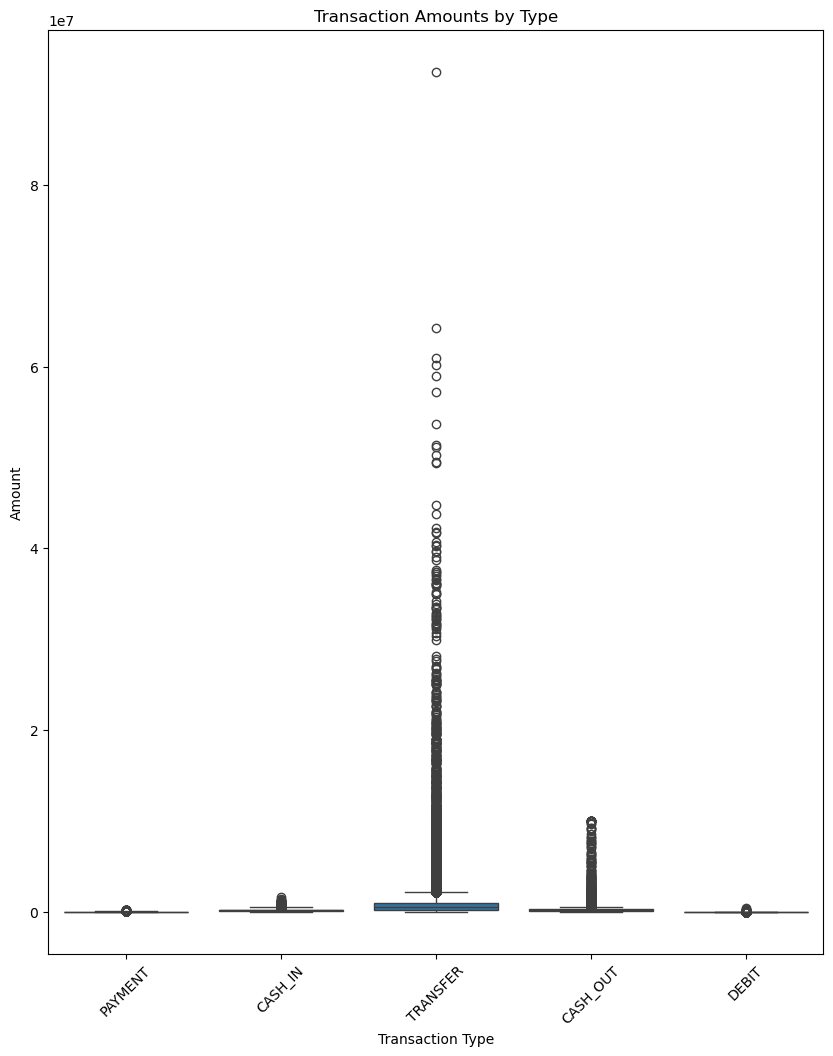

In [70]:
# Visualization of type and amount 
plt.figure(figsize=(10,12))
sns.boxplot(x='type', y='amount', data=banktransactions)
plt.title('Transaction Amounts by Type')
plt.ylabel('Amount')
plt.xlabel('Transaction Type')
plt.xticks(rotation=45)
plt.show()

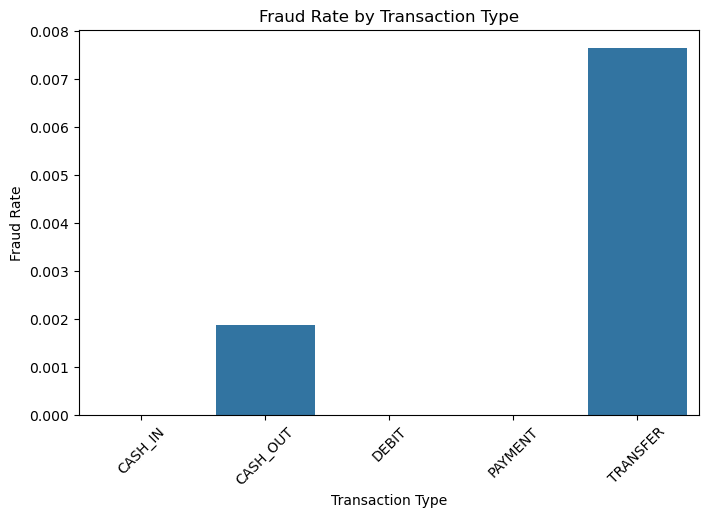

In [69]:
# Calculate fraud rate per type
fraud_type = banktransactions.groupby('type')['isFraud'].mean().reset_index()
# Bar plot of fraud rates
plt.figure(figsize=(8,5))
sns.barplot(x='type', y='isFraud', data=fraud_type)
plt.title('Fraud Rate by Transaction Type')
plt.ylabel('Fraud Rate')
plt.xlabel('Transaction Type')
plt.xticks(rotation=45)
plt.show()

In [71]:
# One-hot encode the 'type' column
transactions_conversions = pd.get_dummies(banktransactions, columns=['type'], drop_first=True)
transactions_conversions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 18 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amount                   1000000 non-null  float64
 1   nameOrig                 1000000 non-null  object 
 2   oldbalanceOrg            1000000 non-null  float64
 3   newbalanceOrig           1000000 non-null  float64
 4   nameDest                 1000000 non-null  object 
 5   oldbalanceDest           1000000 non-null  float64
 6   newbalanceDest           1000000 non-null  float64
 7   isFraud                  1000000 non-null  int64  
 8   isFlaggedFraud           1000000 non-null  int64  
 9   isHighAmount             1000000 non-null  bool   
 10  isHighRiskType           1000000 non-null  bool   
 11  highAmount_highRiskType  1000000 non-null  int64  
 12  origin_balance_zeroed    1000000 non-null  int64  
 13  dest_was_empty           1000000 non-null  

## Q3

After exploring your data, you may have noticed that fraudulent transactions are rare compared to non-fraudulent ones. What challenges might this pose when training a machine learning model? What strategies could you use to ensure your model learns meaningful patterns from the minority class? Apply your data transformations (if any) in the code-block below.

Without enough training data for fradulent tranactions to make the model accurate this could cause the model to miss fradulent activity. To ensure our model learns meaningful patterns and detects fraud we can use smote to oversample or provide more balanced data.

In [ ]:
# Count of fraudulent vs. non-fraudulent transactions
banktransactions['isFraud'].value_counts()

isFraud
0    998703
1      1297
Name: count, dtype: int64

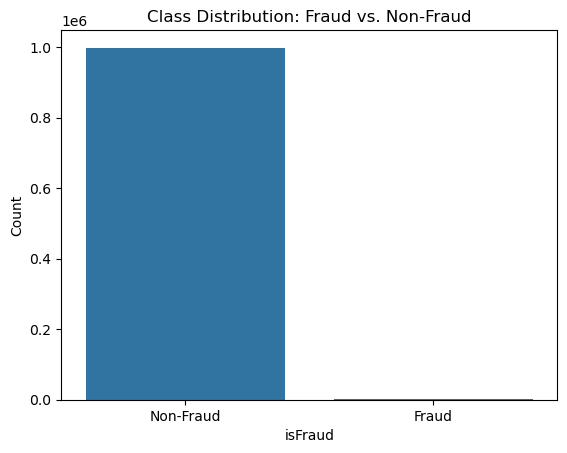

In [54]:
#Visualize fraud and non-fraud data 
sns.countplot(x='isFraud', data=banktransactions)
plt.title('Class Distribution: Fraud vs. Non-Fraud')
plt.xlabel('isFraud')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

In [55]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
# X = features, y = target
X = transactions_conversions.drop(columns=['isFraud', 'nameOrig', 'nameDest'], errors='ignore')
y = transactions_conversions['isFraud']

In [35]:
#Use smote to balance classes 
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X,y)

In [60]:
# Check new class balance using value_counts()
print("Train data before SMOTE:")
print(y_train.value_counts())

print("\nY data after SMOTE:")
print(y_resampled.value_counts())

Train data before SMOTE:
isFraud
0    699092
1       908
Name: count, dtype: int64

Y data after SMOTE:
isFraud
0    998703
1    998703
Name: count, dtype: int64


In [86]:
print(X_train.dtypes)

amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFlaggedFraud      int64
type_CASH_OUT        bool
type_DEBIT           bool
type_PAYMENT         bool
type_TRANSFER        bool
dtype: object


## Bonus (optional)

Are there interaction effects between variables (e.g., fraud and high amount and transaction type) that aren't captured directly in the dataset? Would it be helpful to manually engineer any new features that reflect these interactions? Apply your data transformations (if any) in the code-block below.

Yes some features were created based on potential occurances of fraud like high amount transferred or withdrwn and or empty balances. 

In [79]:
df = banktransactions.copy()

In [80]:
print(df.columns.tolist())


['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'isHighAmount', 'isHighRiskType', 'highAmount_highRiskType', 'origin_balance_zeroed', 'dest_was_empty']


In [83]:
# Create a flag for high-value amounts
df['isHighAmount'] = df['amount'] > 1e6

# Create a flag for high-risk transaction amounts
df['isHighRiskType'] = df['type'].isin(['TRANSFER', 'CASH_OUT'])

# Interaction feature: high amount + high-risk type
df['highAmount_highRiskType'] = (
    df['isHighAmount'] & df['isHighRiskType']
).astype(int)

# Balance behavior feature: balance dropped to zero after transaction
df['origin_balance_zeroed'] = (
    (df['newbalanceOrig'] == 0) & (df['amount'] > 0)
).astype(int)

# Destination account was empty before transaction
df['dest_was_empty'] = (
    df['oldbalanceDest'] == 0
).astype(int)

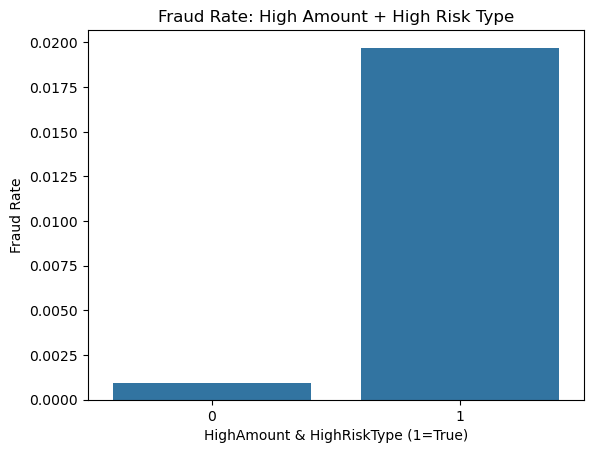

In [84]:
# Calculate fraud rate grouped by new feature
fraud_rate = df.groupby('highAmount_highRiskType')['isFraud'].mean().reset_index()

# Plot
sns.barplot(x='highAmount_highRiskType', y='isFraud', data=fraud_rate)
plt.title('Fraud Rate: High Amount + High Risk Type')
plt.xlabel('HighAmount & HighRiskType (1=True)')
plt.ylabel('Fraud Rate')
plt.show()

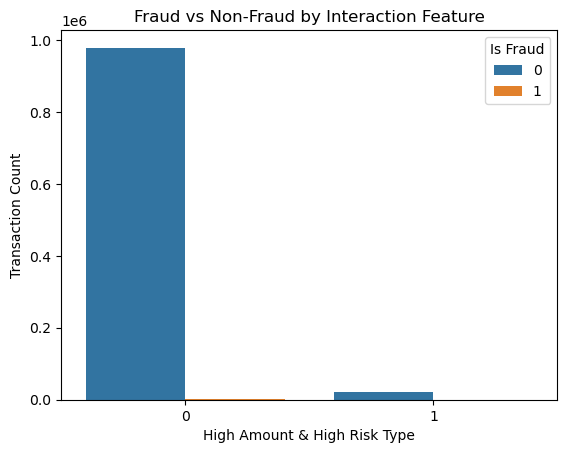

In [76]:
sns.countplot(data=df, x='highAmount_highRiskType', hue='isFraud')
plt.title('Fraud vs Non-Fraud by Interaction Feature')
plt.xlabel('High Amount & High Risk Type')
plt.ylabel('Transaction Count')
plt.legend(title='Is Fraud')
plt.show()

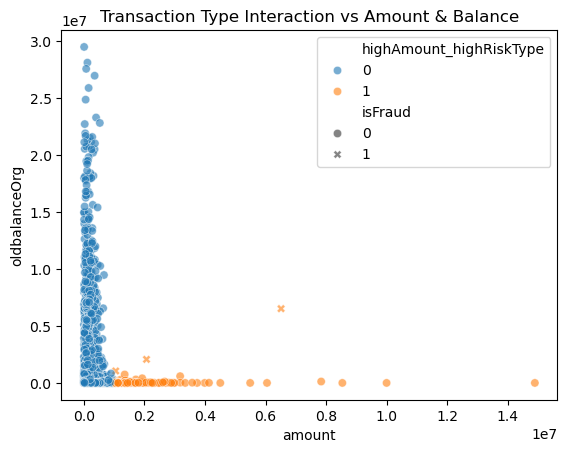

In [77]:
sns.scatterplot(
    data=df.sample(5000),  # sample for clarity
    x='amount',
    y='oldbalanceOrg',
    hue='highAmount_highRiskType',
    style='isFraud',
    alpha=0.6
)
plt.title('Transaction Type Interaction vs Amount & Balance')
plt.show()

In [85]:
banktransactions_transformed = df.to_csv('transformed_transactions.csv', index=False)